# Result Visualizer

Different visualizations of anomaly detection result, including forecasts, reconstructions, anomaly scores, predicted and actual anomalies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/FL/tmp/mtad-gat-pytorch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pickle
from sklearn.metrics import f1_score, precision_score, recall_score
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import cufflinks as cf
import glob
import sys
import json
import more_itertools as mit
from tqdm.notebook import tqdm
cf.go_offline()
init_notebook_mode

sys.path.insert(0, '.')
from plotting import Plotter

/content/drive/MyDrive/FL/tmp/mtad-gat-pytorch


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Provide what output to visualize
In case of multiple models trained for the same dataset, they will be saved in different folders named using the datetime of training.
Use 'model_id' to specify which to load, '-1' for latest, '-2' for second latest, etc, or you can specify the exact datetime. 

In [11]:
# res_path = './output/MSL'
# res_path = './output/SMAP'
res_path = './output/SMD/1-1'

In [12]:
plotter = Plotter(res_path, model_id='-1')
plotter.result_summary()

Loading results of ./output/SMD/1-1/03122022_174729


/content/drive/MyDrive/FL/tmp/mtad-gat-pytorch/./plotting.py:55: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/content/drive/MyDrive/FL/tmp/mtad-gat-pytorch/./plotting.py:31: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/content/drive/MyDrive/FL/tmp/mtad-gat-pytorch/./plotting.py:32: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented fra

Result summary:
Epsilon:
		precision: 0.77, recall: 1.00, F1: 0.87
POT:
		precision: 0.56, recall: 1.00, F1: 0.72
Brute-Force:
		precision: 1.00, recall: 1.00, F1: 1.00


## Interactive plot 
- Interactive plot of forecastings, reconstructions,actual values, errors, etc of the specified feature.
- Params:
    - ```feature```: which feature to visualize
    - ```plot_train```: whether to also plot for train set
    - ```plot_errors```: whether to plot anomaly scores (error) for the feature
    - ```plot_feature_anom```: if True, the feature-wise threshold and anomaly prediction is included
    - ```start```: start index of dataset
    - ```end```: end index of dataset

If ```plot_feature_anom``` is set to True:
- Predicted anomalies (for the particular feature) are visualized by a light blue rectangle.
- As we only predict one feature for SMAP and MSL, the actual (true) anomalies are included using a red rectangle, making correctly predicted anomalies purple.


In [13]:
plotter.plot_feature(
    feature=0, 
    plot_train=True, 
    plot_errors=True, 
    plot_feature_anom=True,
    start=350, 
    end=3000
)

Output hidden; open in https://colab.research.google.com to view.

### Global (entity-level) Anomaly Predictions 
```plot_global_predictions``` and ```plotly_global_predictions``` visualize the entity-level anomaly scores which are used to make anomaly predictions at entity-level.
In ```plotly_global_predictions```:
- Actual (true) anomalies are visualized by a red rectangle
- Predicted anomalies are visualized by a blue rectangle. 
- Thus, if anomalies are predicted correctly the color of the rectangle will be purple. 

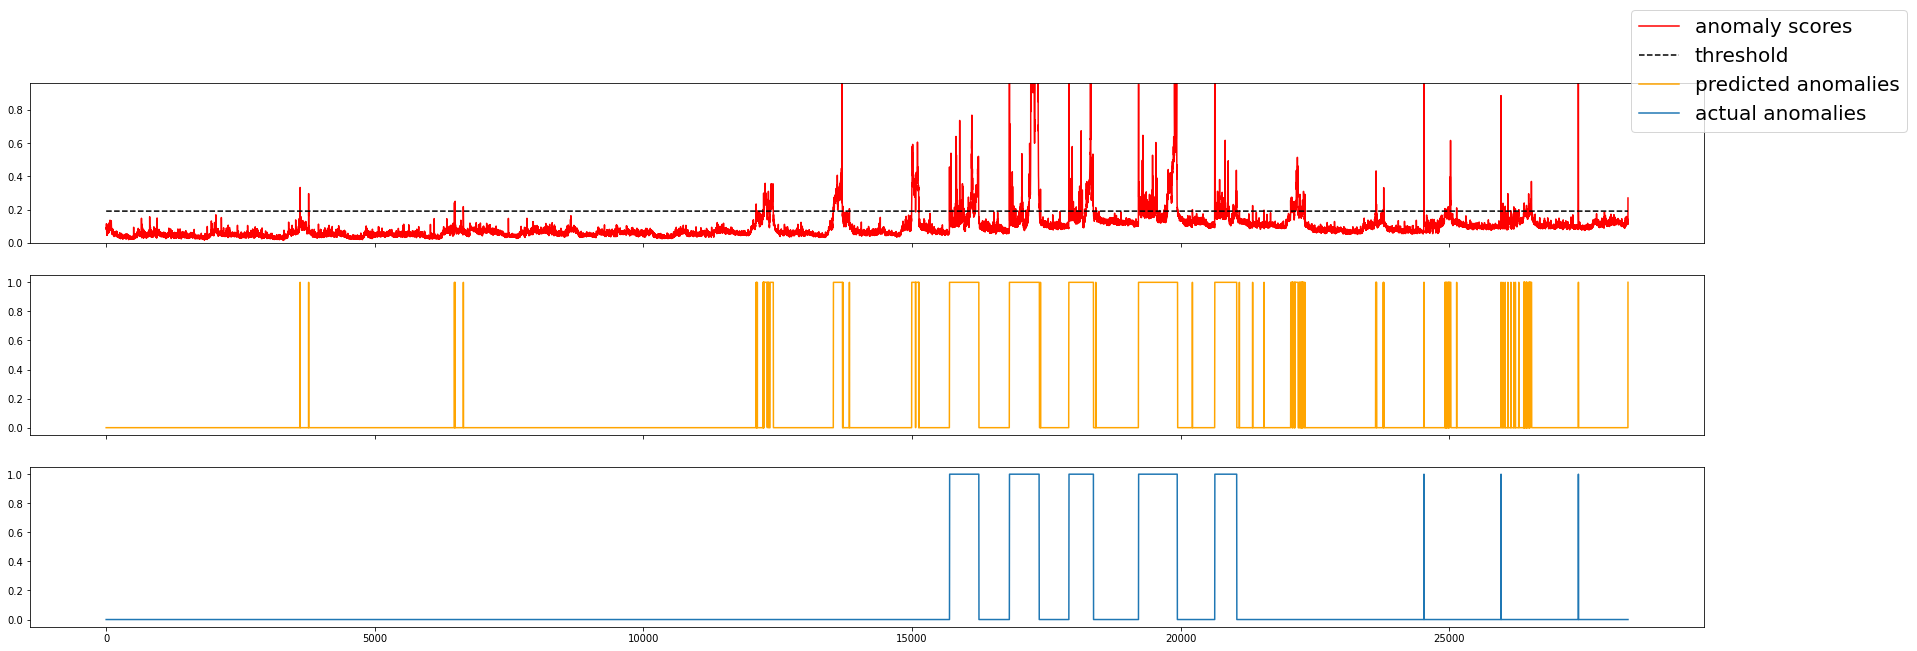

In [14]:
plotter.plot_global_predictions(type="test")

In [15]:
plotter.plotly_global_predictions(type="test")

Output hidden; open in https://colab.research.google.com to view.

In [16]:
plotter.plot_all_features(type='test')

Output hidden; open in https://colab.research.google.com to view.